<a id='top'></a>

### Probability and Simulation
***

Andrew Hahn

***



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import random

***


****

To play a game, you have a bag containing 30 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 17 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 3 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

In [26]:
def prob_six(n): #Your code goes here.
    return 0.6/(0.6 + 0.34*((.75)**n) + 0.06*(.3**n))
PartDCheck=prob_six(1)
print("Verify this is the same as part D: "+str(PartDCheck))

Verify this is the same as part D: 0.6872852233676976


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [27]:
inN=1
prob=0
while prob <.95:
    prob=prob_six(inN)
    inN+=1
print(str(inN)+ " Rolls Required")

10 Rolls Required


***

Oscar and Stella are two octopuses who are very excited to have both secured professorships in the Computer Science department at CU. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking. Eg. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, he wants to go to the brewing market to grab a coffee. That being said, Osacar has made a break through in his research and wants to follow up on it at the library, but he needs to run some errands too. Assume Oscar can do his errands at any location on the map. 

Compute by hand the probability that Oscar goes to the Brewing Market ($C$) in his first stop, makes a second stop at any location, then goes to the Library ($L$) third. 

**Part B**: Stella is a competitive body-building octopus professor. This is quite the feat given her lack of bones!  Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Engineering Center ($E$). (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

**Part C**: Suppose that Stella works late at the Engineering Center, while Oscar goes to the Gym.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [28]:
graph = { "E" : ["R","G","L","C"],
          "L" : ["H", "E","C","G"],
          "H" : ["G", "L", "C"],
          "C" : ["H","L","E"],
          "G" : ["R", "E","L","H"],
          "R" : ["G","E"]
        }

def walk(initial,steps,graph):
    stepsTaken=[]
    for x in range(steps):
        location=random.choice(graph[initial])
        initial=location
        stepsTaken.append(location)
    return stepsTaken

probArray=[]
for i in range(0,10000):
    steps=walk("E",3,graph)
    if steps==["C","H","L"]:
        probArray.append(1)
    elif steps==["C","E","L"]:
        probArray.append(1)
    else:
        probArray.append(0)
    steps=[]
probabilityA=np.mean(probArray)
print("Probability of A after 10000 iterations: "+str(probabilityA))
    

Probability of A after 10000 iterations: 0.0469


In [29]:
# Part B
probArray2=[]
probArray5=[]
for i in range(0,10000):
    oneStepTaken=walk("E",1,graph)
    if oneStepTaken[0]=="G":
        probArray2.append(1)
    else:
        probArray2.append(0)
    oneStepTaken=[]
    
for i in range(0,10000):
    twoStepsTaken=walk("E",2,graph)
    if twoStepsTaken[1]=="G":
        probArray5.append(1)
    else:
        probArray5.append(0)

probFirst=np.mean(probArray2)
probSecond=np.mean(probArray5)
probabilityB=probFirst+probSecond
print("Probability of B after 10000 iterations: "+str(probabilityB))

Probability of B after 10000 iterations: 0.4193


In [30]:
# Part C
probArray3=[]
for i in range(0,100000):
    stepStella=walk("E",1,graph)
    stepOscar=walk("G",1,graph)
    if stepStella==stepOscar:
        probArray3.append(1)
    else:
        probArray3.append(0)  
    steps=[]
probabilityC1=np.mean(probArray3)
print("Probability of C1 after 10000 iterations: "+str(probabilityC1))

probArray4=[]
for i in range(0,100000):
    stepsStella=walk("E",2,graph)
    stepsOscar=walk("G",2,graph)
    if stepsStella[1]=="H"==stepsOscar[1]:
        probArray4.append(1)
    else:
        probArray4.append(0)
    steps=[]
probabilityC2=np.mean(probArray4)
print("Probability of C2 after 10000 iterations: "+str(probabilityC2))

Probability of C1 after 10000 iterations: 0.12551
Probability of C2 after 10000 iterations: 0.01299


***

As part of their Computer Science Jedi training, Zach and Rachel are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Zach practicing his sweetest Jedi moves and trying to strike Rachel, then Rachel practicing *her* best moves and trying to strike Zach.
* If Zach manages to strike Rachel, then Zach is awarded a point, and similarly if Rachel manages to strike Zach, then Rachel is awarded a point.
* If a round ends in a tie, then Zach and Rachel proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $Z$ be the event that "Zach wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Zach successfully lands his lightsaber strikes with probability $p$, and Rachel lands her strikes with probability $q$.

**Part A**: The duel will continue until Zach or Rachel wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Zach has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

**Part B**: Determine $P(Z \mid E)$ in terms of $p$ and $q$.

**Part C**: Explain why events $C$ and $Z$ are independent. 

**Part D**: Use the Law of Total Probability to show that $P(Z) = p(1-q) + (2pq - p - q +1) ~P(Z \mid C)$. 

**Part E**: Use the fact from **Part B** (Did it mean C?) that $P(Z \mid C) = P(Z)$ to determine $P(Z)$ in terms of $p$ and $q$.

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

The duel that happens after a round with no winner is no different than the first round of a new duel. This is because the result of one lightsaber strike is independent of the other strikes, including those in other rounds. Therefore the probability Zach wins at any point in the series of rounds is equal to the probability that he wins in just one round in comparison the Rachel.

**Part G**: Explain the significance of the solution technique for $P(Z)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(Z)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

Because we know that Z is independent of C. It is a much simpler calculation to use that procedure rather than to use a Bayes Theorem solution. (Also P(C|Z)=0 which complicates matters). We can't always use that technique however, as if the events were not independent the probabilities of Z and C would have been dependent on one another and our caluclations based on their independent likelihoods would have been accurate.

***


In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \\$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 3, 7, 15, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect either \\$50 or \\$250 or pay the bank \\$50.  There is always an equal probability associated with each of these possible cards.


- Squares 0, 10, and 20 do not trigger any action 


- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    

- If the player passes or lands on **GO** she collects \$200. 

- If the player lands on any other square not mentioned above, she pays the bank \$25. 


If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [31]:
def miniopoly_turn(state, cash):
    if cash==0:
        return state, cash
    roll1 = random.randint(0,6)
    roll2 = random.randint(0,6)
    
    if state==30:
        if roll1==roll2:
            state = 10+roll1+roll2
        else:
            cash -= 20
            return state, cash
        
    else:
        state += roll1 + roll2   
        
    if state >= 40:
        cash += 200
        state -= 40
        
    if state in [3,7,15,22,33,36]:
        cash += random.choice([50,250,-50])
        return state, cash 

    elif state in [0,10,20,30]:
        return state, cash
    
    else:
        cash-=25
        return state, cash

**Part B**: Use your function from **Part A** to Simulate at least 10000 25-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game.

In [32]:
#Simulation for Part B
simState=0
simCash=200
finalCash=[]
for j in range(0,10001):
    for i in range(1,25):
        simState,simCash=miniopoly_turn(simState,simCash)
    finalCash.append(simCash)
    simState=0
    simCash=200

Text(0,0.5,'# of games')

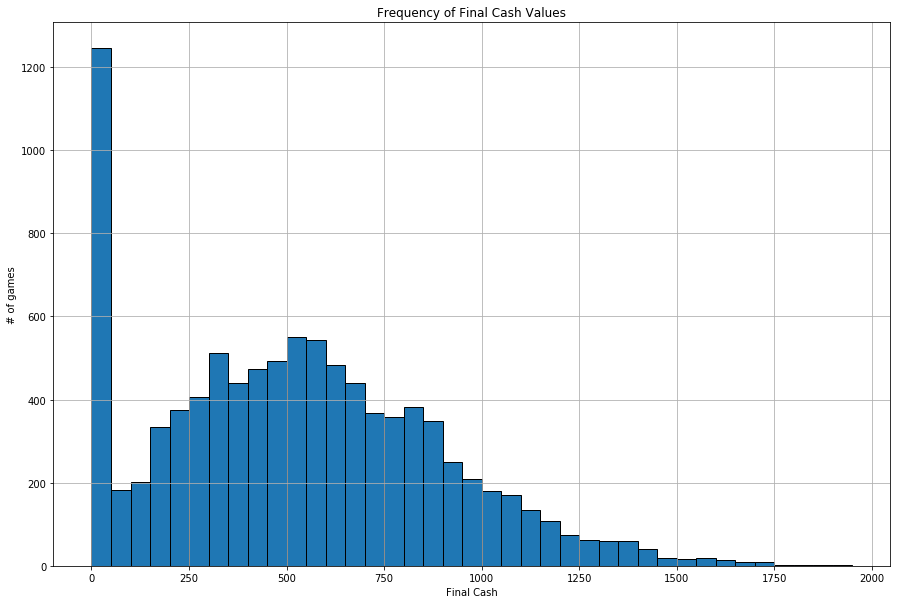

In [33]:
#Frequency histogram
my_bins = range(0,2000,50)
cashSeries = pd.Series(finalCash)
fig, ax=plt.subplots(figsize=(15,10))
cashSeries.hist(ax=ax, edgecolor='black',bins=my_bins)
ax.set_title('Frequency of Final Cash Values')
ax.set_xlabel('Final Cash')
ax.set_ylabel('# of games')

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a game that only lasts 25 turns.

In [34]:
#Estimation of probability of going bankrupt
bankrupt=[]
for i in range(0,len(finalCash)):
    if finalCash[i]==0:
        bankrupt.append(1)
    elif finalCash[i]!=0:
        bankrupt.append(0)
probBankrupt=np.mean(bankrupt)
print("Probability of going bankrupt: "+str(probBankrupt))

Probability of going bankrupt: 0.11078892110788921


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a 25 turn game  _given_ that they went to **Jail** at least twice.  Is a player more or less likely to go bankrupt if they've been to **Jail** twice?  

In [35]:
#Note that this estimation is not counting remaining in jail 
#as a second visit to jail
finalCash=[]
simState=0
simCash=200
prevJail=False
twoJail=[]
numJailVisits=0
finalCash=[]
bothArray=[]
bankrupt=[]

for j in range(0,10001):
    for i in range(1,25):
        simState,simCash=miniopoly_turn(simState,simCash)
        if simState==30 and prevJail==False:
            numJailVisits+=1
            prevJail==True
        else:
            prevJail==False   
                
    if numJailVisits>=2:
        twoJail.append(1)
    else:
        twoJail.append(0)  
        
    finalCash.append(simCash)
    simState=0
    simCash=200
    numJailVisits=0
    prevJail=False
    
for k in range(0,len(finalCash)):
    if finalCash[k]==0:
        bankrupt.append(1)
    else:
        bankrupt.append(0)
        
for l in range(0,10001):
    if bankrupt[l]==1 and twoJail[l]==1:
        bothArray.append(1)
    elif bankrupt[l]==0 and twoJail[l]==1:
        bothArray.append(0)
        
probBankruptGivenTwoJail=np.mean(bothArray)
print("Probability of bankruptcy given two jails visits: "+ str(probBankruptGivenTwoJail))
    

Probability of bankruptcy given two jails visits: 0.09318801089918256


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least twice, given that the player went bankrupt in the first 25 turns.

In [36]:
#Estimate probability of going to jail twice, given bankruptcy in first 25 turns.
#P(J2|B)=P(B|J2)*P(J2)/P(B)
PTwoJail=np.mean(twoJail)
PTwoJailGivenBankrupt=(probBankruptGivenTwoJail*PTwoJail)/probBankrupt
print("Probability of having been to jail twice given having gone bankrupt: "+str(PTwoJailGivenBankrupt))

Probability of having been to jail twice given having gone bankrupt: 0.3086642599277979


***


To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *claim* that has a 10% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *claim* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *claim* is false is 5%

If they *find* an important result they are published.  What is the probability that their *claim* was true, given that they were published?